## Misinformation regarding Corona-virus
### Corona Drama (Team 8)
Muskaan Narula (muskaannarula22),
 Yesrat Rahman (yr2818), 
 Yohannes Afework (yohannes17)

### Problem Statement: 
Understanding the spread of information and misinformation on social media regarding Coronavirus using Reddit API data. 
### Description of the Project Topic: 
COVID-19 has become the greatest public health challenge for the whole world, and people are dramatically relying on social media to get information such as what should be done to be safe, how many people are infected or dead, or what are the cure. Observing from the beginning of the pandemic, we realized there were so many misleading information posted on social media about the cure, but in reality, there was not any approved cure declared yet. Spreading the misinformation can take people’s lives and cause chaos. Those who are seeking information on social media platforms do not know what to trust or where should look for valid information. It is necessary for all to understand which are the sites and resources we can trust. 

While it is possible to look at past data on misinformation to understand the spread of it across social media, it won’t be representative of the global pandemic. We need to look at the trends in misinformation related to Coronavirus in order to fully understand how to detect it, and eventually prevent its spread.

For our projects, we will be scraping through COVID 19 related data from reddit, where most of the people rely on for information. Be able to observe how quickly this social media can spread misinformation, we can definitely use that to alert general people that we should trust only the health department, or any government approved organization’s provided information. 



### Current limitations and Challenges: 


1. Social media platforms tend to use automated algorithms to label manipulated posts; however, they are not always perfect. Labelling misinformation would need human labor to go manually over each post. But the question comes to play, will social media invest in human labor to solve the issue? (Keller) 
2. Secondly, social media platforms are open for everyone; it does not verify individual’s identity. One post can be shared millions of times within a short period of time. Even if a post is removed, one can easily edit and repost it again. Will social media be able to detect that and label a post within a short time? (Keller)
3. Finally, will the creators of deceptive content accept their fault? They can easily deny as an attempt to obfuscate while asked by the social media. (Keller)


### Who cares?
Based on the current events of the world, we would assume that all people in the general public would care about this topic. The public is in a state of shock and is trying to get information to combat this terrifying virus. If the information they get is inaccurate then it could cause the public more harm and create more panic. 

Another audience that should worry more about this topic would be social media companies. Hopefully our analysis of the false information on the internet during this pandemic will bring awareness to these fake sites that only care about clicks.


### Research Process:

1. Scrape the Reddit API to get the posts related to COVID-19. 
2. Get fake news from subreddit "Covid19Conspiracy."  
3. Get some valid post about Coronavirus from trusted newspaper and channels. 
4. Check how many times one post is shared and get the graph out of it based on the speed of sharing. 
5. Check how many times a post is liked or disliked and compare those two. 
6. Show the ratio of verified information to misinformation on Reddit.
7. Do a sentiment analysis on the fake news and compare that analysis with the CDC post sentiment analysis. 
8. What steps Reddit and some other social media has taken to slower the spread of misinformation (If someone search about Coronavirus on Reddit, it will automatically suggest you to the CDC webpage).
9. Most importantly, we will be looking for a specific pattern that fake news sites follow.

### Research Questionnaires to be Answered:
1. By looking at the spread of misinformation and information graph, we will be able to answer how quickly misinformation and information spread throughout social media. Does it spread faster or slower than valid information? 
2. From the comparison between liked and disliked numbers, we can answer if people are supporting or trusting the fake news than valid news. Hpw many people are trusting fake sites? 
3. Sentimental analysis on both fake and valid posts will tell us how much positive or negative vibe they contain. Do they use certain type of wording or sentences?  
4. If we can find any specific pattern that fake news sites follow, we can give some general advice to the public to be aware of the fake news. Using our research, they should be able to distinguish between fake and valid news. 

 Even if our research will bring some awareness to public, the major responsibility still on social media platforms. They should be more willing to remove and restrict unreliable content. They should take action by disabling likes, shares and retweets for particular posts, and banning users who repeatedly misinform other. 

## Credit Listing:

### Muskaan 
#### Phase 1: 
* Contribution towards project idea.
* Reddit API data collection using subreddit "Covid19Conspiracy". Misinforamtion posts related to COVID-19. 
* Reddit API data collection from trusted newspaper and channels. Valid posts related to COVID-19.
#### Phase 2: 
* Scrape more data 
* Contributed to visualization and analysis.
* Plotted some graphs 
* Explained the code and the results. 
#### Phase 3: 
* Statistical Analysis based on the boxed plot from phase 2 
* Supported the plot findings with statistical analysis
* Contributed towards conclusion 

### Yesrat  
#### Phase 1: 
* Contribution towards project idea.
* Problem Statement, Description of the project topic, Research Process. 
* Challenges and limitations of the topic. 
* Research Questionnaires to be Answered.
#### Phase 2: 
* Contributed to visualization and analysis. 
* Plotted some graphs 
* Explained the code and the results. 
#### Phase 3: 
* Used Afinn analyzer to get the most negative fake news and most positive fact news 
* Found the afinn_score to see how negative fake news are and how positive facts are 
* Credit Listing 
* Contributed towards conclusion 
### Yohannes  
#### Phase 1: 
* Contribution towards project idea.
* Who cares?
* Detailed description of the data we gathered. 
* Description of how we processed it.
#### Phase 2: 
* Contributed to visualization and analysis.
* Plotted some graphs.
* Explained the code and the results. 
#### Phase 3: 
* Contributed towards conclusion 
* Tried to get positive and negative words count for fake and fact news


In [49]:
from os.path import isfile
import praw
import pandas as pd
from time import sleep
import json

# loading credentials function
def load_key(filename):
    with open(filename) as f:
        key_dict = json.load(f)
    return key_dict

In [47]:
#accessing search API
key = load_key('../Redditkey.json')

reddit = praw.Reddit(client_id = key['client_id'],
                     client_secret = key['client_secret'],
                     user_agent =key['user_agent'],
                     username = key['username'], 
                     password =key['password']  ) 


Here, Reddit posts are being extracted that are known to be misinformation. <br/>
In this for-loop, posts in the flair '⚠ Coronavirus ⚠'  are being stored. This flair has posts with questionable content suggesting they are fake news.

In [ ]:
from collections import defaultdict
posts = defaultdict(list)

progress = 0

subreddit = reddit.subreddit('all')
for sub in subreddit.search('flair:"'+'⚠ Coronavirus ⚠'+'"', limit=500):
    if (progress %50 == 0):
        print(progress, "....done")
    if (sub.title not in  posts['Title']):
        posts['Title'].append(sub.title) #post ID
        posts["Author"].append(sub.author) #author
        posts["Created"].append(str(sub.created).strip('.0')) #created date
        posts["Comments"].append(sub.num_comments) #number of comments
        posts["Score"].append(sub.score) #score
        posts["Upvote"].append(sub. upvote_ratio) #score
        posts["Edited"].append(sub.edited) #edited or not
        posts["Url"].append(sub.url) #link
        posts["Body"].append(sub.selftext) #post text
    progress += 1


Still searching all of Reddit, we are searching for the flair 'Coronavirus Conspiracy' which also has obviously fake information and far fetched truths.

In [ ]:
for sub in subreddit.search('flair_name:"'+'Coronavirus Conspiracy'+'"', limit=200):
    if (progress %50 == 0):
        print(progress, "....done")
    if (sub.title not in  posts['Title']):
        posts['Title'].append(sub.title) #post ID
        posts["Author"].append(sub.author) #author
        posts["Created"].append(str(sub.created).strip('.0')) #created date
        posts["Comments"].append(sub.num_comments) #number of comments
        posts["Score"].append(sub.score) #score
        posts["Upvote"].append(sub. upvote_ratio) #score
        posts["Edited"].append(sub.edited) #edited or not
        posts["Url"].append(sub.url) #link
        posts["Body"].append(sub.selftext) #post text
    progress += 1

Now we turn to popular and used reddit forums to get posts marked as misinformation there. <br/>
The first flair we check is 'Rumor - Unconfirmed Source' to diversify our collected data. This will include posts that contain speculated and untrusted information. understanding these could lead to understanding how they lure in readers.

In [ ]:
subreddit = reddit.subreddit('China_Flu')
for sub in subreddit.search('flair:"'+'Rumor - Unconfirmed Source'+'"', limit=500):
    if (progress %50 == 0):
        print(progress, "....done")
    if (sub.title not in  posts['Title']):
        posts['Title'].append(sub.title) #post ID
        posts["Author"].append(sub.author) #author
        posts["Created"].append(str(sub.created).strip('.0')) #created date
        posts["Comments"].append(sub.num_comments) #number of comments
        posts["Score"].append(sub.score) #score
        posts["Upvote"].append(sub. upvote_ratio) #score
        posts["Edited"].append(sub.edited) #edited or not
        posts["Url"].append(sub.url) #link
        posts["Body"].append(sub.selftext) #post text
    progress += 1

Another Reddit commnunity is Covid19Conspiracy. This is dedicated to conspiracy theories and false news relating to Coronavirus. 

In [ ]:
subreddit = reddit.subreddit('Covid19Conspiracy')
for sub in subreddit.top(limit=200):
    if (progress %50 == 0):
        print(progress, "....done")
    if (sub.title not in  posts['Title']):
        posts['Title'].append(sub.title) #post ID
        posts["Author"].append(sub.author) #author
        posts["Created"].append(str(sub.created).strip('.0')) #created date
        posts["Comments"].append(sub.num_comments) #number of comments
        posts["Score"].append(sub.score) #score
        posts["Upvote"].append(sub. upvote_ratio) #score
        posts["Edited"].append(sub.edited) #edited or not
        posts["Url"].append(sub.url) #link
        posts["Body"].append(sub.selftext) #post text
    progress += 1
        
import pandas
misinfo = pandas.DataFrame(posts) #dataframe of data
misinfo.shape
        

In [ ]:
#stroing misinfo in covid19conspiracy.csv file
misinfo.body = misinfo.Body.map(lambda x: 'empty' if len(x)==0 else x)
misinfo.to_csv('./covid19conspiracyUPDATE.csv', encoding='utf-8')

Now we are extracting data from Reddit that is factual and trusted. <br/>
We have created a list of trusted news sources in the trusted list below. This is used to cross reference any posts we collect to know it is valid information. <br/>
For our first search, we looked at the subreddit Coronavirus which is a really popular community to discuss the pandemic. 

In [ ]:
#extracting data for factual information
subreddit = reddit.subreddit('Coronavirus')

from collections import defaultdict
items = defaultdict(list)
trusted = ['bbc.co.uk', 'usatoday.com', 'cnn.com', 'cnbc.com', 'washingtonpost.com',
           'forbes.com', 'bloomberg.com', 'theguardian.com', 'foxnews.com', 'scientificamerican.com', 
           'espn.com','gov.uk', 'channelnewsasia.com', '.gov', 'hindustantimes.com', 'npr.org', '.org']
def is_trusted(url):
    for item in trusted:
        if (item in url):
            return True
    return False
progress = 0
for sub in subreddit.top(limit=900):
    if (progress %50 == 0):
        print(progress, "....done")
    if(is_trusted(sub.url) and sub.title not in items['Title'] ):
        items['Title'].append(sub.title) #post ID
        items["Author"].append(sub.author) #author
        items["Created"].append(str(sub.created).strip('.0')) #created date
        items["Comments"].append(sub.num_comments) #number of comments
        items["Score"].append(sub.score) #score
        items["Upvote"].append(sub. upvote_ratio) #score
        items["Edited"].append(sub.edited) #edited or not
        items["Url"].append(sub.url) #link
        items["Body"].append(sub.selftext) #post text
        progress += 1
print(progress)

We then looked at another Community. We tried to do this to get data from multiple sources and communities rather than just one. To ensure we didn't get the same posts twice, we double checked the post with the collected data.

In [ ]:
subreddit = reddit.subreddit('China_Flu')
progress = 0
#CDC / WHO
for sub in subreddit.top(limit=900):
    if (progress %50 == 0 and progress != 0):
        print(progress, "....done")
    if(is_trusted(sub.url) and sub.title not in items['Title']):
        items['Title'].append(sub.title) #post ID
        items["Author"].append(sub.author) #author
        items["Created"].append(str(sub.created).strip('.0')) #created date
        items["Comments"].append(sub.num_comments) #number of comments
        items["Score"].append(sub.score) #score
        items["Upvote"].append(sub. upvote_ratio) #score
        items["Edited"].append(sub.edited) #edited or not
        items["Url"].append(sub.url) #link
        items["Body"].append(sub.selftext) #post text
        progress += 1 
print(progress)

We are also getting posts from a community that is meant for the USA specifically

In [ ]:
subreddit = reddit.subreddit('CoronavirusUS')
progress = 0
#CDC / WHO
for sub in subreddit.top(limit=900):
    if (progress %50 == 0 and progress != 0):
        print(progress, "....done")
    if(is_trusted(sub.url) and sub.title not in items['Title']):
        items['Title'].append(sub.title) #post ID
        items["Author"].append(sub.author) #author
        items["Created"].append(str(sub.created).strip('.0')) #created date
        items["Comments"].append(sub.num_comments) #number of comments
        items["Score"].append(sub.score) #score
        items["Upvote"].append(sub. upvote_ratio) #score
        items["Edited"].append(sub.edited) #edited or not
        items["Url"].append(sub.url) #link
        items["Body"].append(sub.selftext) #post text
        progress += 1
print(progress)

We are also getting posts from a community that is meant for the UK too

In [ ]:
subreddit = reddit.subreddit('CoronavirusUK')
progress = 0
#CDC / WHO
for sub in subreddit.top(limit=500):
    if (progress %50 == 0 and progress != 0):
        print(progress, "....done")
    if(is_trusted(sub.url) and sub.title not in items['Title']):
        items['Title'].append(sub.title) #post ID
        items["Author"].append(sub.author) #author
        items["Created"].append(str(sub.created).strip('.0')) #created date
        items["Comments"].append(sub.num_comments) #number of comments
        items["Score"].append(sub.score) #score
        items["Upvote"].append(sub. upvote_ratio) #score
        items["Edited"].append(sub.edited) #edited or not
        items["Url"].append(sub.url) #link
        items["Body"].append(sub.selftext) #post text
        progress += 1
print(progress)

We are also getting data from another COVID 19 community

In [ ]:
subreddit = reddit.subreddit('nCov')
progress = 0
#CDC / WHO
for sub in subreddit.top(limit=900):
    if (progress %50 == 0 and progress != 0):
        print(progress, "....done")
    if(is_trusted(sub.url) and sub.title not in items['Title']):
        items['Title'].append(sub.title) #post ID
        items["Author"].append(sub.author) #author
        items["Created"].append(str(sub.created).strip('.0')) #created date
        items["Comments"].append(sub.num_comments) #number of comments
        items["Score"].append(sub.score) #score
        items["Upvote"].append(sub. upvote_ratio) #score
        items["Edited"].append(sub.edited) #edited or not
        items["Url"].append(sub.url) #link
        items["Body"].append(sub.selftext) #post text
        progress += 1
print(progress)
print("Collection Complete!")
fact = pandas.DataFrame(items) #dataframe of data
fact.shape

In [ ]:
#stroing misinfo in covid19facts.csv file
fact.body = fact.Body.map(lambda x: 'empty' if len(x)==0 else x)
fact.to_csv('./covid19factsUPDATE.csv', encoding='utf-8')

### Description of the Data Collected:
For our initial data collection, we focused on collecting two major sets of data. The first is the example set of data
for the misinformation on the internet. We collected this data from a reddit community called “Covid19Conspiracy”. This reddit group posts information and theories that are mostly either false or unverified. For each post in this group 
we collected nine attributes. These attributes include: The author, its score on reddit, its upvote percentage, whether 
or not the post has been edited, the url in the post, and the text in the post.

The second set of data was for factual information on Covid-19. We collected the exact same attributes for each post as
the previous data. However, for this data set we chose to get posts from the “Coronavirus” subreddit that had links to a few trusted links that we confirmed were verified. Once we collected both sets of data we put them into a dataframe and created two csv file with all the information. 
"covid19facts.csv" contains the verified information about Coronavirus. 
"covid19conspiracy.csv" contains the misinformation about Coronavirus. 



### Major Changes for Phase-2: 
#### Collection of Reddit Data 
1. For this part, we went back to our data scraping. This time, we were able to collect 391 valid information data and 528 misinformation data from Reddit. 
2. First of all, we get the posts from the flairs named '⚠ Coronavirus ⚠','Coronavirus Conspiracy' are being stored. These flairs have posts with questionable content suggesting they are fake news.
3. Then we used popular and used reddit forms to get posts marked as misinformation. We got the data from 'Rumor - Unconfirmed Source.'
4. Finally, we get data from valid sources such as known newspaper, channels and government organizations. Some of them are: bbc.co.uk', 'usatoday.com', 'cnn.com', 'cnbc.com', 'washingtonpost.com','forbes.com. We also scrape some data from 'CoronavirusUS' only for the United States and from 'CoronavirusUK' to know about other countries information. 
* We explained the code and visualization as we proceed. 

#### Things we tried but Failed for phase 2: 
* First, we perform VADER sentiment analysis on the data collected by us in the "covid19factsUPDATE.csv," and 'covid19conspiracyUPDATE.csv' files. We generated positive, negative and neutral sentiment scores for all the titles of the posts. Then we did a plot distribution of the positive, neutral, and negative scores across the dataset.
* We were excepting that there will be a huge difference between the facts and fake news titles; however, both the visualization graphs looked almost similar. So, we had to change our idea and come up with something new.

### Major Changes for Phase-3: 
* For pahse 3, a two sample statistic test was conducted to claim that the positive and negative posts are different when it comes to fake and factual news.
* We used AINN to analyze test corpus for occurance on any arbitary word list. We used it to see if fakenews has more negative words than facts. 

#### Things we tried but failed for phase 3: 
* We tried to do a text analysis based on counting the negative and positive word counts, but we failed to get the counts. 
* We also tried to use passive aggresive classifier to find the accuracy percentage of fakenews and facts. In order to do that, we need to label the fake news as fake news and facts as real news and combine the two data sets. We also failed to finish the task. 
* We also made a .txt file that contains the fake news body, and wanted to find the positive and negative word counts. Because mostly the fake news tend to have more negative vibes in them. But we were not sure how to compare the words with negative words, the most news do not have any body. 


## Future Goal: 
* For this part, we only tried some visualization and discussed our findings. Compared the results with fake news and actual news. 
* Our next goal is to use statics and support our findings. 

In [27]:
# Import all the things we need for the visualization
from os.path import isfile
import praw
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
from collections import defaultdict 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import numpy as np

In [28]:
# opens misinformation CSV file
import csv
orig = pd.read_csv('covid19factsUPDATE.csv')
facts = orig.drop(columns=['Unnamed: 0'])
facts.shape

(391, 9)

In [29]:
# opens factual CSV file
orig = pd.read_csv('covid19conspiracyUPDATE.csv')
fakenews = orig.drop(columns=['Unnamed: 0'])
fakenews.shape 

(528, 9)

In [30]:
# Checking the body of the fakenews and how many are there. 
# We didn't use the body of fakenews yet, but will look forward to use it 
p = 0
for i in fakenews.Body:
    if str(i) != 'nan':
        #print(i)
        p+=1
print(p)

117


### Code Documentation: 
1.	Created a function which takes three parameters pos, neg, and neu. They are the positive, negative, and neutral sentiment values of the title of the posts collected. 
2.	If the positive value is greater than the negative value, return the positive value. If the value if equal to zero, change the value to zero. 
3.	Do the same for negative value. 
4.	After the comparison, we define two new function that takes the new positive and negative values. If the new positive value is greater than the negative value return the positive else return the negative value. 



In [31]:
def get_sentiment(pos, neg, neu):
    if (pos > neg):
        if (pos == 0):
            return float('nan')
        return pos
    if (neg > pos):
        if (neg == 0):
            return float('nan')
        return neg*-1
def fix_pos(pos, neg):
    if pos > neg:
        return pos
def fix_neg(pos, neg):
    if neg > pos:
        return neg

### Code Documentation: 
* Created a dictionary with the positive, negative, neutral values, fake news titles, changed sentiment values, and upvote of the actual data frame, and converted to a data frame of fake news. 


In [32]:
# Create post title dictionary to store positive, negative, and neutral sentiments.

title_list1 = fakenews["Title"].to_list()

title_dict1 = defaultdict(list)
analyzer = SentimentIntensityAnalyzer()
#Checks if the titles are in the list 
for title in title_list1:
    vs = analyzer.polarity_scores(title)
    title_dict1["pos"].append( fix_pos(vs["pos"],vs["neg"]))
    title_dict1["neu"].append(vs["neu"])
    title_dict1["neg"].append( fix_neg(vs["pos"],vs["neg"]))
    title_dict1["Fakenews_Title"].append(title)
    title_dict1["Sentiment"].append(get_sentiment(vs["pos"],vs["neg"], vs["neu"]))
title_dict1["Upvote"] = fakenews.Upvote
title_data_fakenews = pd.DataFrame(title_dict1)
title_data_fakenews

,pos,neu,neg,Fakenews_Title,Sentiment,Upvote
0,NaN,0.698,0.302,WATCH: Candace Owens Destroys Leftist Narrativ...,-0.302,0.67
1,0.119,0.881,NaN,The UN Is Now Admitting That This Coronavirus ...,0.119,1.00
2,NaN,1.000,NaN,YouTube Takes Down Bio-Tech Firm’s Video Expla...,NaN,1.00
3,NaN,0.621,0.255,Israel To Have Two Heads Of State While Corona...,-0.255,1.00
4,NaN,1.000,NaN,“So It Was a Hoax?” – Fox News’ John Roberts C...,NaN,1.00
...,...,...,...,...,...,...
523,0.286,0.714,NaN,HOW TO MAKE YOUR OWN COVID19 DISINFECT HAND GEL,0.286,0.67
524,NaN,1.000,NaN,176 new confirmed cases in The Netherlands tod...,NaN,0.67
525,NaN,1.000,NaN,Asymptomatic transmission happens.,NaN,0.67
526,NaN,1.000,NaN,"155 New infections in The Netherlands today, b...",NaN,0.67


### Code Documentation: 
* Created a dictionary with the positive, negative, neutral values, valid news titles, changed sentiment values, and upvote of the actual data frame, and converted to a data frame of facts. 

In [33]:

title_list = facts["Title"].to_list()
title_list
title_dict = defaultdict(list)
analyzer = SentimentIntensityAnalyzer()
for title in title_list:
    vs = analyzer.polarity_scores(title)
    title_dict["pos"].append( fix_pos(vs["pos"],vs["neg"]))
    title_dict["neu"].append(vs["neu"])
    title_dict["neg"].append( fix_neg(vs["pos"],vs["neg"]))
    title_dict["Facts_Title"].append(title)
    title_dict["Sentiment"].append(get_sentiment(vs["pos"],vs["neg"], vs["neu"]))
title_dict["Upvote"] = facts.Upvote
title_data_facts = pd.DataFrame(title_dict)
title_data_facts


,pos,neu,neg,Facts_Title,Sentiment,Upvote
0,NaN,1.000,NaN,Mark Cuban says bailed out companies should ne...,NaN,0.94
1,NaN,1.000,NaN,White House advisor Dr. Fauci works 20-hour da...,NaN,0.93
2,NaN,0.686,0.216,Bill Gates says the US missed its chance to av...,-0.216,0.89
3,NaN,0.773,0.227,"For the first time in US history, every state ...",-0.227,0.94
4,NaN,0.618,0.265,Just a reminder that during the Ebola crisis D...,-0.265,0.93
...,...,...,...,...,...,...
386,NaN,1.000,NaN,U.S. Officials Link COVID-19 Disinformation Ca...,NaN,0.93
387,NaN,0.687,0.313,Coronavirus Crisis Disrupting Flow of Mail Int...,-0.313,1.00
388,NaN,1.000,NaN,American Man With Coronavirus Dies At Hospital...,NaN,0.93
389,NaN,1.000,NaN,How Coronaviruses Cause Infection--from Colds ...,NaN,1.00


### Visialization and Analization: 
* Here, we did two plots based on the sentiments of the fake news and actual news titles. 
* The blue plot is for factual news, and the orange on is for fake news. 
* From looking at both plot, not many differences can be pointed. For both graph, both postive and negative values are almost evenly distributed. Which means that, both fake news and actual news tend to have postive and negative reactions to it. 

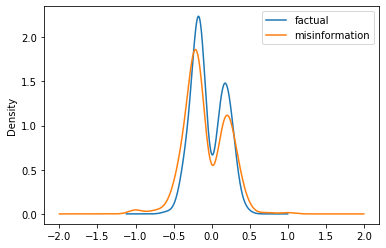

In [34]:
ax = title_data_facts.Sentiment.plot.kde(label='factual')
title_data_fakenews.Sentiment.plot.kde(label='misinformation')
ax.legend()

### Code Visualization: 
* Here, we did two box plots based on the positive and negative sentiments of titles. The analysis is given after the plots. 

(0, 1)

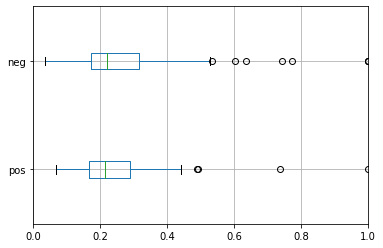

In [35]:
ax = title_data_fakenews.boxplot(column=['pos','neg'], vert=False)
ax.set_xlim(0,1)

(0, 1)

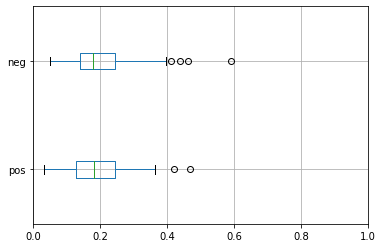

In [36]:
ax = title_data_facts.boxplot(column=['pos','neg'], vert=False)
ax.set_xlim(0,1)

###  Analysis and Findings from the Plots: 
* We started off by trying to understand whether Coronavirus misinformation follows the same trends as other misinformation? Usually fake news titles have extreme statements to convince people to click on them. The goal here is to determine if Coronavirus fake news follows the same patterns. 
* A sentiment analysis of the titles in the misinformation data was performed. Then, the negative posts distribution was plotted against the positive posts distribution. In this boxplot, the negative boxplot marks the distribution of the negatively associated posts, and the positive boxplot, the positive. 
* We have also performed a sentiment analysis on the titles of the factual posts data, and plotted their distributions. 
* When comparing the positive and negative distributions of the misinformation data, we see that the negative posts seem to be skewed more to the right than the positive posts. This suggests that the negative posts tend to be more extremely negative than the positive posts are positive. Looking at the information data, this seems to be consistent too. Negative posts are more negative. The major difference in the boxplots between the two datasets is that the distribution of both the positive and negative is more extreme in the misinformation dataset than the distribution of the factual news dataset. 
* This suggests that while fake news tends to exaggerate the titles more than it does the truth. Coronavirus misinformation is in line with the trend of most misinformation.

### Statistical Analysis

A two sample statistic test was conducted to claim that the positive and negative posts are different when it comes to fake and factual news. 

### Code Explaination 
First, the positive posts were taken from both the misinformation posts and factual posts. 

Here are the hypothesis that were tested at the significance level of 0.05:

* P(fakenews) = positive posts in fake news
* P(facts) = positive posts in factual news

Null Hypothesis: P(fakenews) = P (facts) <br>
Alternative Hypothesis:  P(fakenews) != P (facts)

In [47]:
import scipy.stats as sc
stat_pos, p_val_pos = sc.ttest_ind(title_data_fakenews['pos'], title_data_facts['pos'], equal_var=True, nan_policy='omit' )
p_val_pos

0.0024937230769817562

### Findings and Analysis: 
Since P-value = 0.00249 < 0.05, the null hypothesis must be rejected and the positive posts in the fake news are different from the ones in the factual news.

### Code Explaination: 
Also, the negative posts were taken from both the misinformation posts and factual posts.

Here are the hypothesis that were tested at the significance level of 0.05:

N(fakenews) = positive posts in fake news
N(facts) = positive posts in factual news
Null Hypothesis: N(fakenews) = N (facts)
Alternative Hypothesis: N(fakenews) != N (facts)

In [48]:
stat_neg, p_val_neg  = sc.ttest_ind(title_data_fakenews['neg'], title_data_facts['neg'], equal_var=True, nan_policy='omit' )
p_val_neg

7.495705045699112e-06

### Findings and Analysis: 
Since P-value = 7.5 * 10-6 < 0.05, the null hypothesis must be rejected and the negative posts in the fake news are different from the ones in the factual news.

###  Analysis and Findings from the Plots: 
* We started off by trying to understand whether Coronavirus misinformation follows the same trends as other misinformation? Usually fake news titles have extreme statements to convince people to click on them. The goal here is to determine if Coronavirus fake news follows the same patterns. 
* A sentiment analysis of the titles in the misinformation data was performed. Then, the negative posts distribution was plotted against the positive posts distribution. In this boxplot, the negative boxplot marks the distribution of the negatively associated posts, and the positive boxplot, the positive. 
* We have also performed a sentiment analysis on the titles of the factual posts data, and plotted their distributions. 
* When comparing the positive and negative distributions of the misinformation data, we see that the negative posts seem to be skewed more to the right than the positive posts. This suggests that the negative posts tend to be more extremely negative than the positive posts are positive. Looking at the information data, this seems to be consistent too. Negative posts are more negative. The major difference in the boxplots between the two datasets is that the distribution of both the positive and negative is more extreme in the misinformation dataset than the distribution of the factual news dataset. 
* This suggests that while fake news tends to exaggerate the titles more than it does the truth. Coronavirus misinformation is in line with the trend of most misinformation.

### Visualization between Sentiment and Upvote: 
* We created two sctter plots between sentiment of title and Upvote based on the fake news and actual news.
  The analysis is given after the plots. 

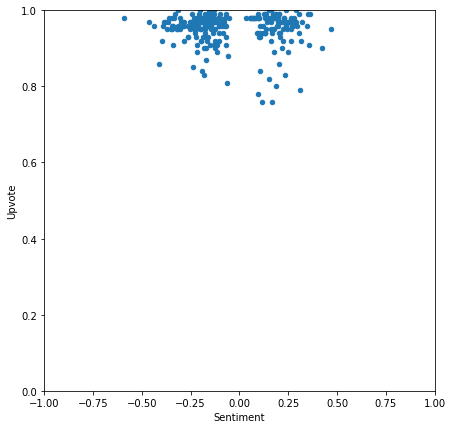

In [49]:
# Plot for facts 
title_data_facts.plot.scatter(x='Sentiment', y='Upvote', xlim=(-1,1), ylim=(0,1), figsize=(7,7))

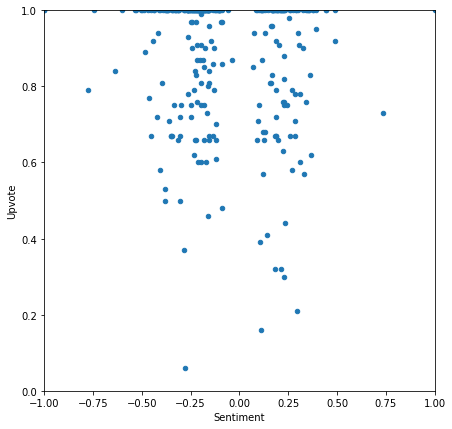

In [50]:
# Plot for fake news 
title_data_fakenews.plot.scatter(x='Sentiment', y='Upvote',  xlim=(-1,1), ylim=(0,1), figsize=(7,7))

### Plot Analysis and Findings: 
* From the two plots above, there are two clusters formed. One for the slightly positive values, and one for slightly negative values.
* We can see that for the fake news, the dots are more distributed than the actual news dots.
* For example, if the upvote ratio is .5, this means 50 people liked the post, and 50 people disliked the post.
* For the slightly negative value, the upvotes are less distributed than the positive side. Which means that people are responding more strongly to the posts that has negative connotations. People are less likely to like the posts that are misinformation and are able to figure the difference between fake and actual news.  



### Code Explanation: 
* Here, we visualize a scatter plot based on comments and upvote of fake news. It shows the relationship between the number of comments on a post and its upvote ratio. The findings are described after the plot. 

Text(0, 0.5, 'Upvote Ratio')

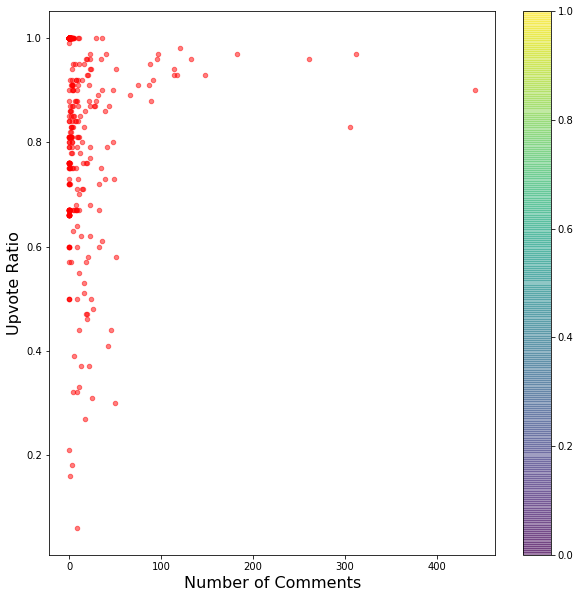

In [51]:
i = fakenews.Comments
u = fakenews.Upvote

p = fakenews.plot.scatter(x='Comments', y='Upvote', 
                    c = 'red', 
                    colormap=plt.cm.copper, 
                    figsize=(10,10), 
                    alpha=0.5,
                    sharex=False) 

p.set_xlabel("Number of Comments", fontsize=16)
p.set_ylabel("Upvote Ratio", fontsize=16)

### Analysis and Findings: 
* The hypothesis we wanted to test is whether divisive posts cause more interactions with posts on reddit. 
* Based on the graph, we can conclude that our hypothesis is incorrect and that people ignore posts that don't make sense.
* These posts were found in a subreddit that posts conspiracies on COVID-19. 


### Code Deocumentation: 
* Here, we visualize another scatter plot based on comments and score of fake news. The x label is marked as "Number of 
    comments" and y axis is labeled as "Total Score on Reddit." 

Text(0, 0.5, 'Total Score on Reddit')

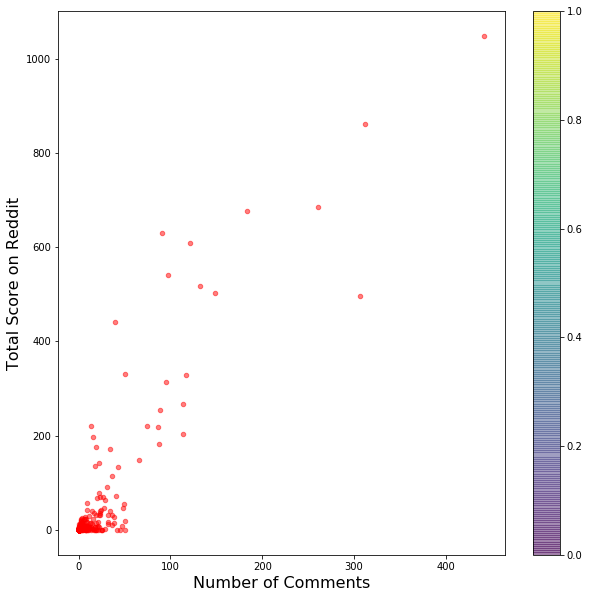

In [52]:
k = fakenews.plot.scatter(x='Comments', y='Score', 
                    c = 'red', #color
                    colormap=plt.cm.copper, 
                    figsize=(10,10), 
                    alpha=0.5,
                    sharex=False) 
k.set_xlabel("Number of Comments", fontsize=16)
k.set_ylabel("Total Score on Reddit", fontsize=16)


### Analysis and Findings: 
* This is scatterplot is also testing the hypothesis from before. It also shows 
    that posts with lower scores, have lower commments or less interactoin. Which means that people are actually aware of     fake news and trying to avoid them. 

In [152]:
from afinn import Afinn 

### Code Explaination: 
* Setting the lanuge to English 
* Using Afinn to extimate the Afinn sentiment Score for Titles of fakenews 
* Then apply the scorer to the 'Title" column to create a new column 
* .describes gives a sense of distribution 

In [161]:
afinn = Afinn(language = 'en')
fakenews['afinn_score'] = fakenews['Title'].apply(afinn.score)
fakenews['afinn_score'].describe() 


count    528.000000
mean      -0.969697
std        2.044809
min      -10.000000
25%       -2.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: afinn_score, dtype: float64

### Code Explaination: 
* Sorted the afinn_score to get the sense of what is the extreme scoring title. Then subsset the dataframe to display the two relevent columns. 

In [162]:
display = ['Title', 'afinn_score']
fakenews.sort_values(by='afinn_score')[display]

,Title,afinn_score
164,Criminal With ‘Violent History’ Freed Due to C...,-10.0
398,.... how using data manipulation in combinatio...,-10.0
333,"Have you seen the fake ""weed kills coronavirus...",-8.0
210,‘Wuhan Plague’ Plaques Placed Around Atlanta b...,-8.0
17,Wolf Administration is Caught Adding Up to 269...,-8.0
...,...,...
198,Wouldn’t It Be Wonderful If Coronavirus Brough...,4.0
44,Nobel Prize Winner Says Coronavirus Had To Com...,4.0
18,Mankind's Best Friend: Dogs Being Trained To D...,4.0
67,Biden Says He Is ‘Excited’ By Coronavirus ‘Opp...,5.0


In [163]:
# Gives the most negative title among the fakenews 
most_negative = fakenews.iloc[164]['Title']
most_negative

'Criminal With ‘Violent History’ Freed Due to Coronavirus Arrested In Carjacking, Hammer Attack'

* One drawback is that using the raw Afinn score the longer score might produce higher values beacuse they contain more words. To adjust that, we did the following 
* We can divide the original score by the word count to produce afinn_adjusted. This isn’t exactly a percentage variable, since word scores in Afinn can range from -5 to 5, but it is a useful adjustment to control for variable comment length. To make it clearer that this isn’t a percent score, and to make the results more readable, the adjustment is multiplied by 100.

In [164]:
def word_count(text_string):
    '''Calculate the number of words in a string'''
    return len(text_string.split())
fakenews['word_count'] = fakenews['Title'].apply(word_count)
fakenews['word_count'].describe()
fakenews['afinn_adjusted'] = fakenews['afinn_score'] / fakenews['word_count'] * 100
fakenews_sentiment_score = fakenews['afinn_adjusted'].describe()
fakenews_sentiment_score

count    528.000000
mean     -11.192929
std       40.379846
min     -400.000000
25%      -18.181818
50%        0.000000
75%        0.000000
max      200.000000
Name: afinn_adjusted, dtype: float64

In [185]:
# Gives the most positive fact news 
facts['afinn_score'] = facts['Title'].apply(afinn.score)
display1 = ['Title', 'afinn_score']
facts.sort_values(by='afinn_score')[display1]
# Most positive news title is the last one with larger positive score 


,Title,afinn_score
59,A Medical Worker Describes Terrifying Lung Fai...,-10.0
284,What Happens If Workers Cutting Up the Nation’...,-10.0
40,Past Mistakes: The Spanish Flu that started on...,-9.0
237,Amazon Worker Who Was Fired After Coronavirus ...,-8.0
279,OSHA Flooded With Thousands of Worker Complain...,-8.0
...,...,...
84,Boris Johnson praises immigrant nurses who sav...,5.0
187,New report on first US case of novel coronavir...,7.0
150,Detroit automakers shut down plants but worker...,7.0
158,‘He just got better and better’: 104-year-old ...,7.0


In [186]:
# Most positive real news 
most_positive = facts.iloc[27]['Title']
most_positive

"'Heads we win, tails you lose': how America's rich have turned pandemic into profit | As 26 million Americans lose their jobs, the billionaire class has added $308bn to its wealth"

In [187]:
def word_count(text_string):
    return len(text_string.split())
facts['word_count'] = facts['Title'].apply(word_count)
facts['word_count'].describe()
facts['afinn_adjusted'] = facts['afinn_score'] / facts['word_count'] * 100
facts_sentiment_score = facts['afinn_adjusted'].describe()
facts_sentiment_score

count    391.000000
mean      -5.895504
std       15.339294
min      -62.500000
25%      -15.000000
50%        0.000000
75%        0.000000
max       55.555556
Name: afinn_adjusted, dtype: float64

### Analysis and Findings: 
* By looking at both score values from fakenews and facts, we can see that they have significant difference between the values. Looking at the min value, suggests that the fekenews carries more negative vibes than facts. They use most informal and vague words which resulted the huge difference between both comparison. 
* This is a helpful finding to suggest people that if a news has more negative and informal words, they are most likely to be fake news. 

## Conclusion
* Looking at the Sentiment Analysis, it's evident that fake news posts follow similar trends as the factual posts. That said the degree of the extremeness of fake news posts is higher than that of factual news. As statistically proven, fake news tends to be either extremely positive or extremely negative. This polarity suggests an element of clickbait-ness that follows that of non-COVID related fake news too. Also observing the response of people to fake news versus factual news, people tend to respond more to those posts that are factual. Most people are successfully weeding out false posts and reacting to them appropriately. It suggests people are being careful about what they believe in a world-wide pandemic where misinformation could have found the perfect breeding ground.

* Our results from the AFINN Sentiment Score also support this idea that factual information does not use heavily bias opinions in their titles. The AFINN scores on the factual subreddits are much closer to zero than the conspiracy subreddit. The AFINN score is calculated by giving certain words a value based on how positive or negative word is. So a 5 is positive bias while -5 is negatively bias.  This shows that the factual info provided is neutral is meant only to inform the audience, instead of spurring on divisive interaction online. It also seems that the more a post is talked about, the more it seems that people don't agree with the post. In the AFINN data collected on the COVID-19 conspiracies subreddit, it seems it was more talked about than the factual info on COV-19 and the AFINN score average was much farther from zero for the COVID-19 conspiracies than the factual info. This shows that the underlying negative sentiment spurs on divisive dialogue online. This finding from our report can alert people to be aware of fake news from simply looking at any news title, and before trusting the news, validate the source of the news.

* Our goal for doing this project to look for specific patterns, the speed of spreading, and see how much people are trusting the fake news. Our group believes, we were able to come up with some interesting findings through our report which will aware the audience about the spread of misinformation. Our report was based on COVID1-19, which is one of the most talked topics now. Understanding this topic can help us to be aware in the future in case of other national or world emergencies.


 ### Works Cited 
1. Keller, Tobias R., and Rosalie Gillett. “Why Is It so Hard to Stop COVID-19 Misinformation Spreading on Social Media?” The Conversation, 14 Apr. 2020, theconversation.com/why-is-it-so-hard-to-stop-covid-19-misinformation-spreading-on-social-media-134396.
2. https://canvas.vt.edu/courses/104561/files/folder/Projects/sample-papers?preview=12664721
3. https://nealcaren.org/lessons/wordlists/

